<a href="https://colab.research.google.com/github/Susmitha-Katta/Breast-Cancer-Classification/blob/main/Breast_Cancer_classification_dataset_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [ ]:
breast_cancer = load_breast_cancer()

In [ ]:
df = pd.DataFrame(breast_cancer.data,columns=breast_cancer.feature_names)

In [ ]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
df['label'] = breast_cancer.target

In [ ]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


Checking for Missing Values

In [ ]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
label                      0
dtype: int64

In [ ]:
breast_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

Data Visualization

Histogram

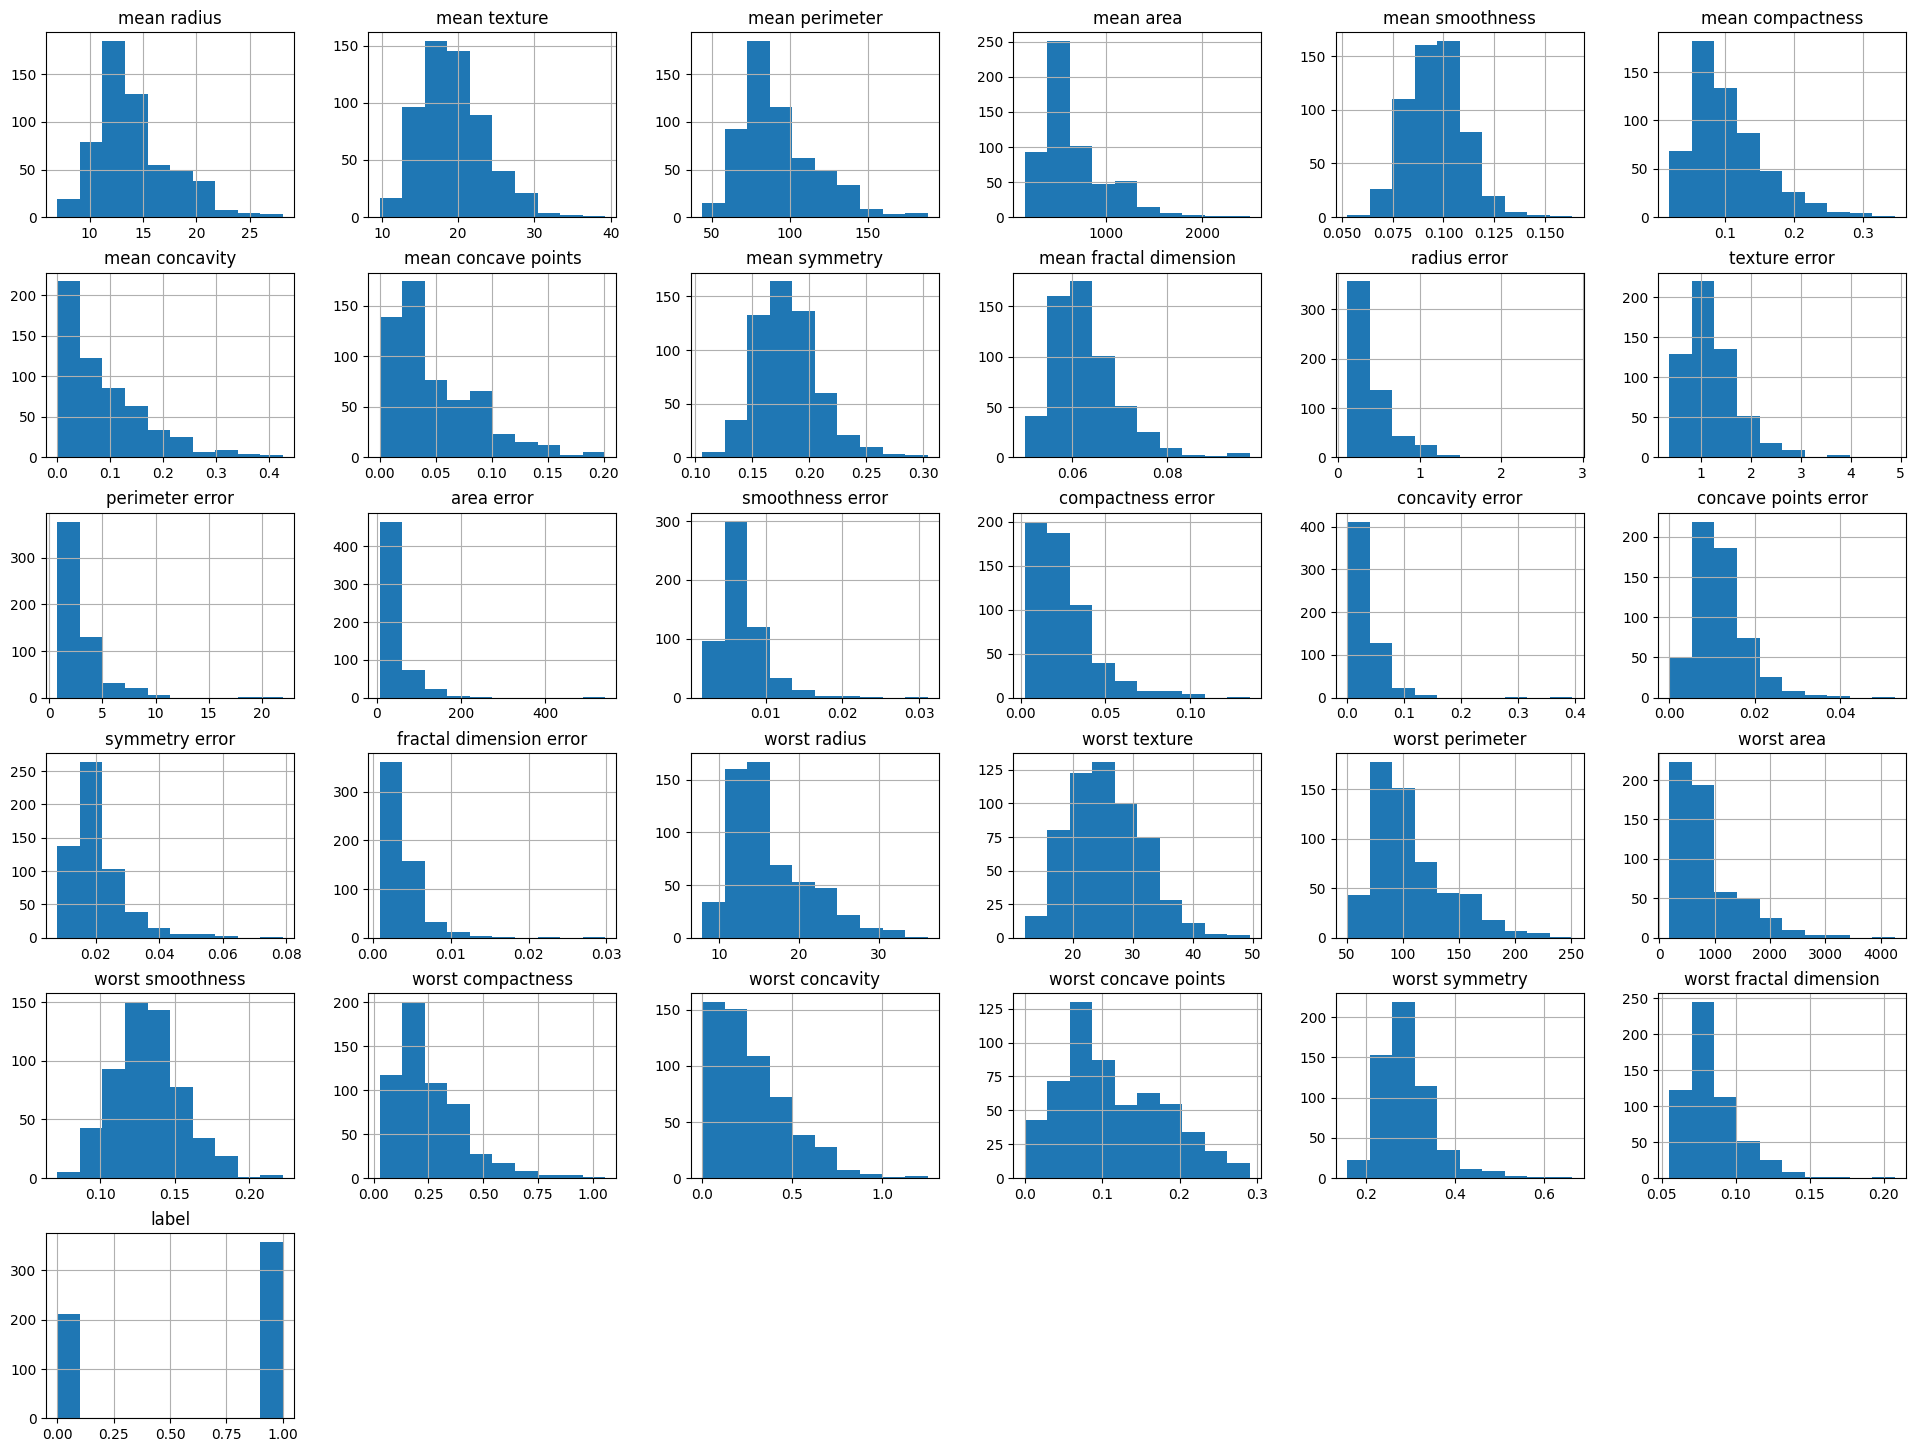

In [ ]:
df.hist(figsize=(24, 18))
plt.show()


Box Plot of feature vs target variables

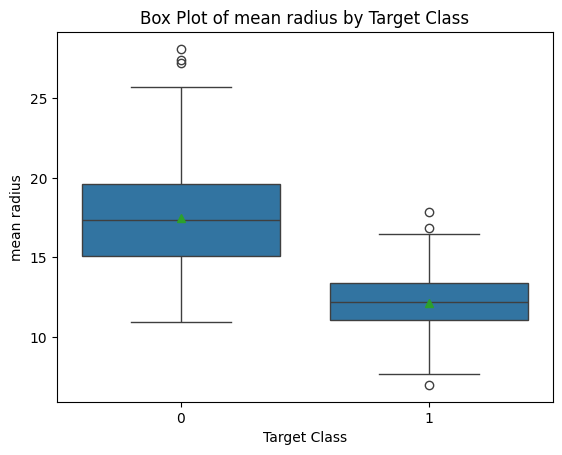

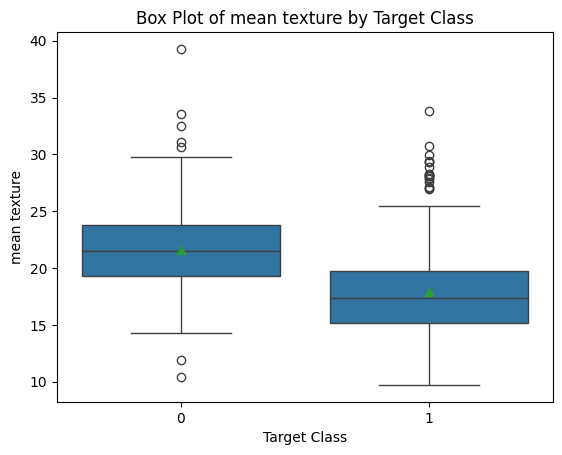

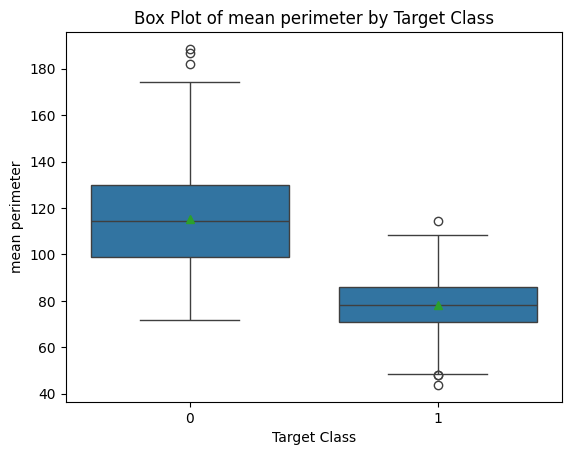

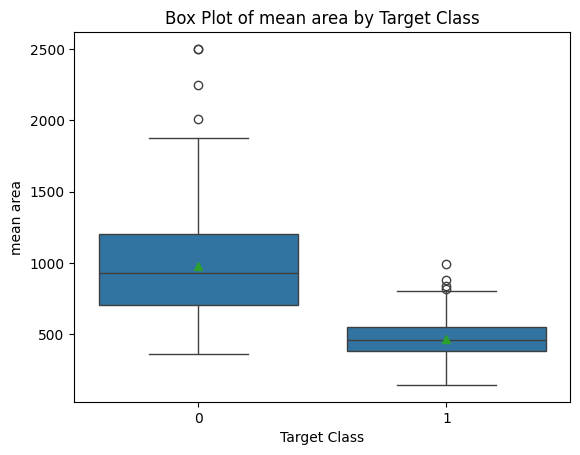

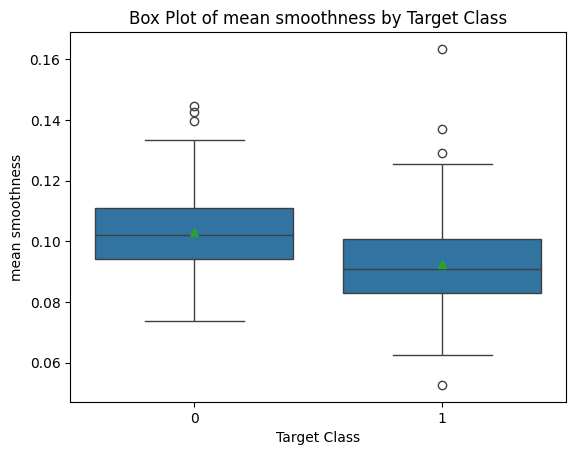

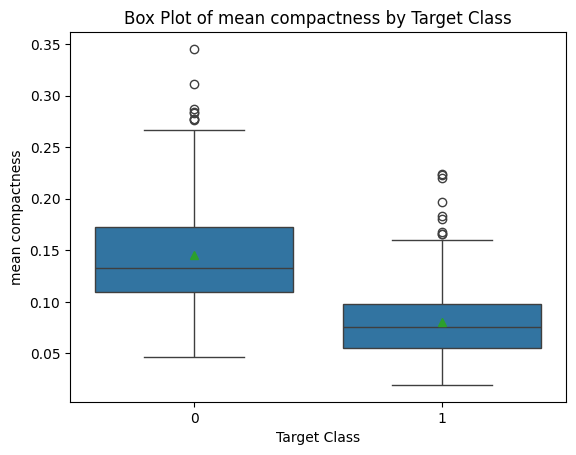

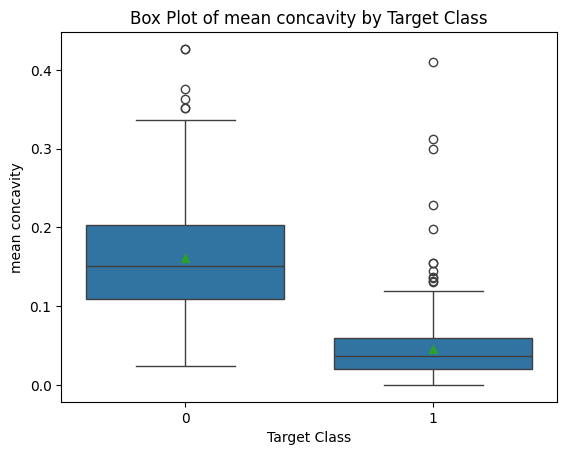

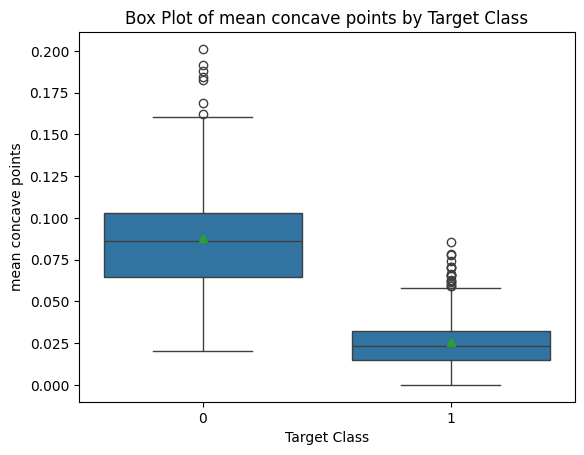

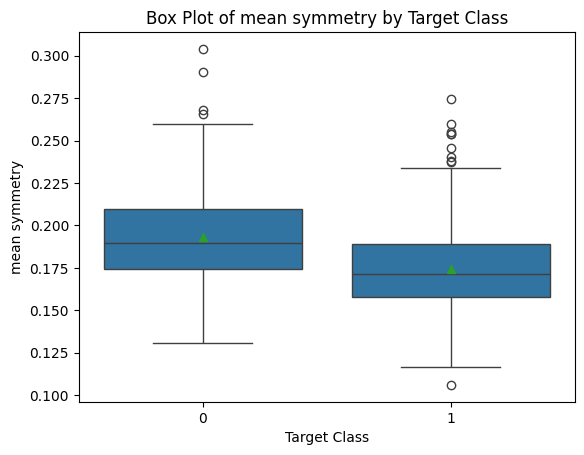

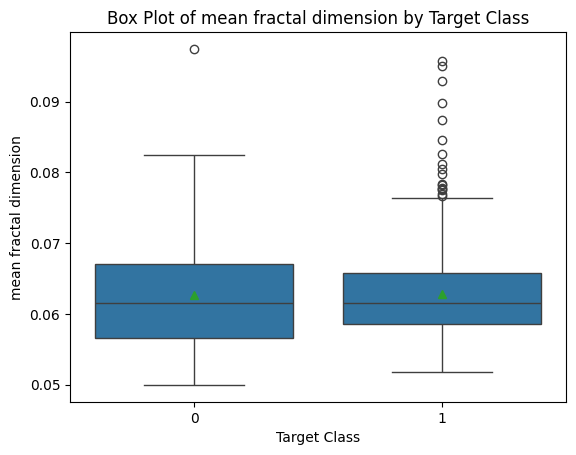

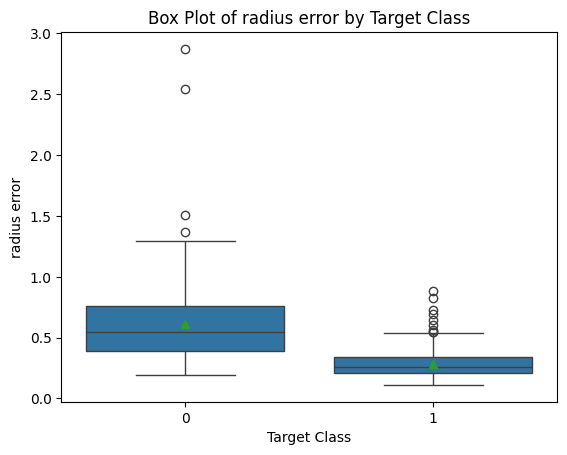

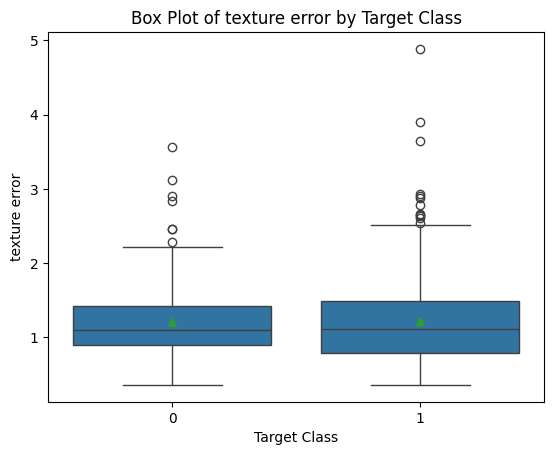

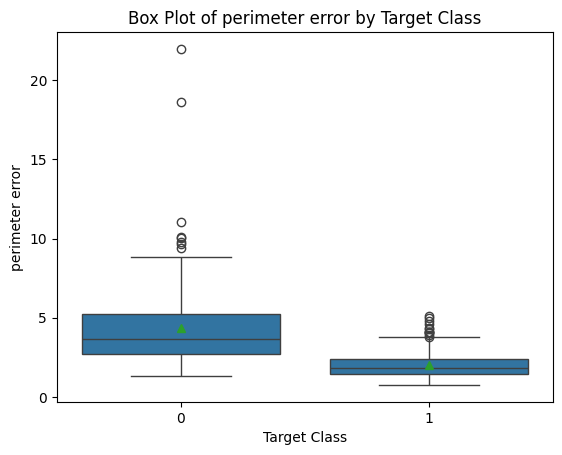

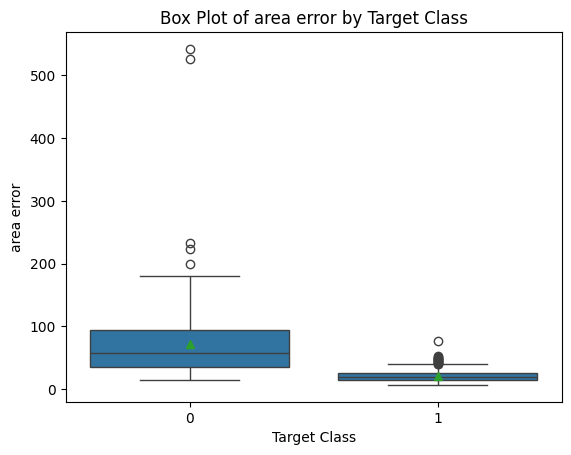

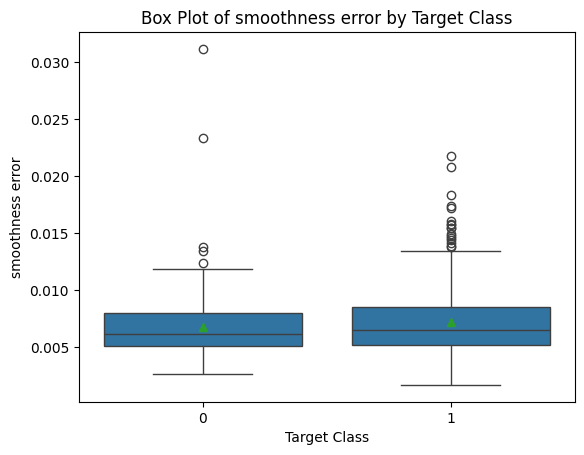

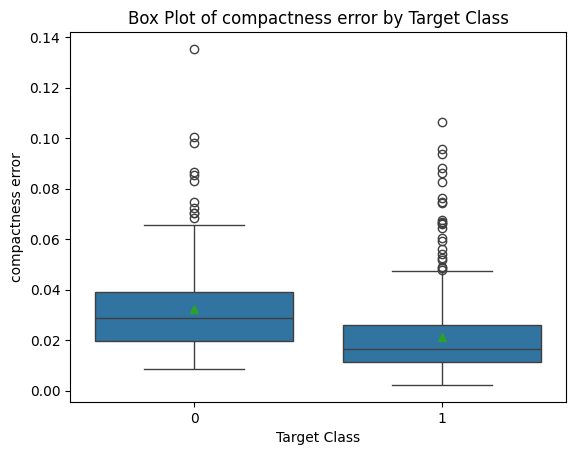

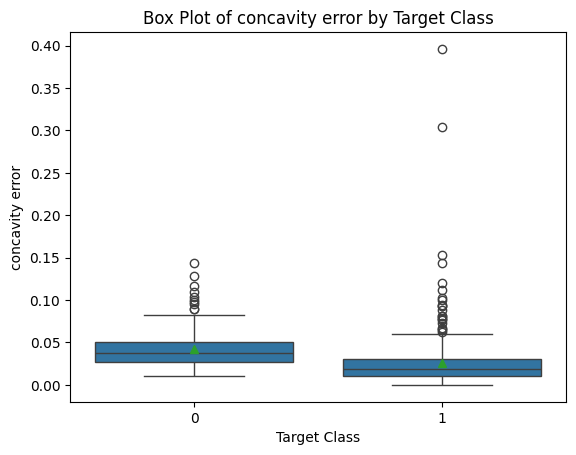

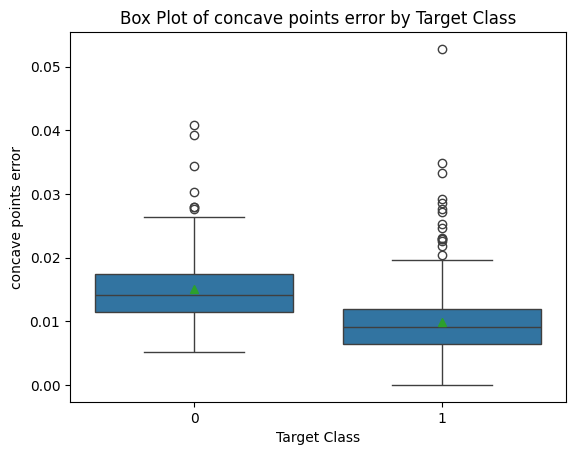

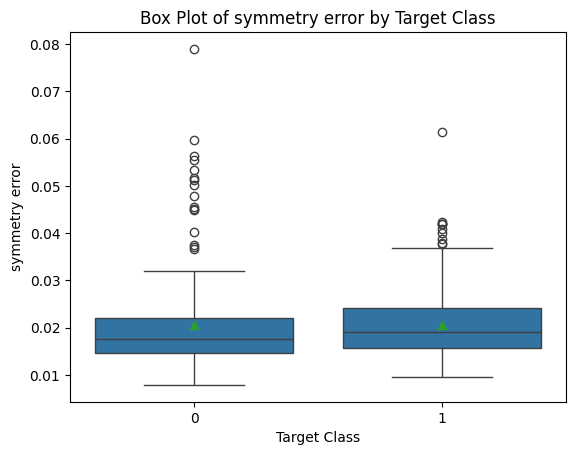

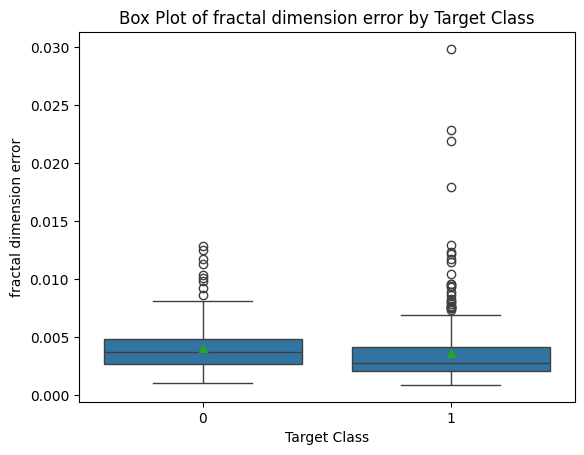

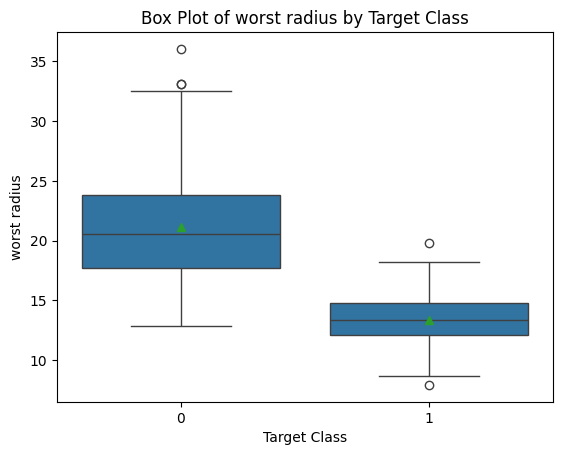

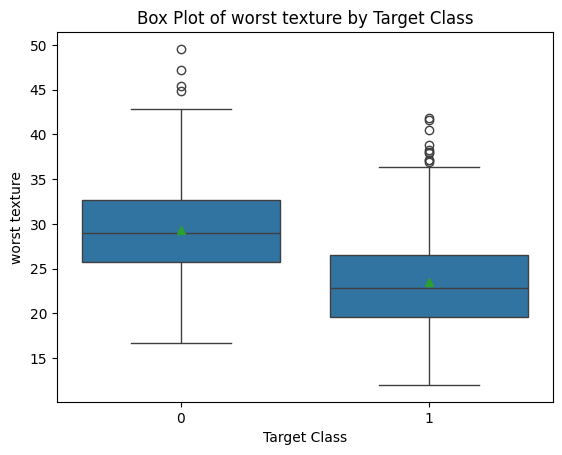

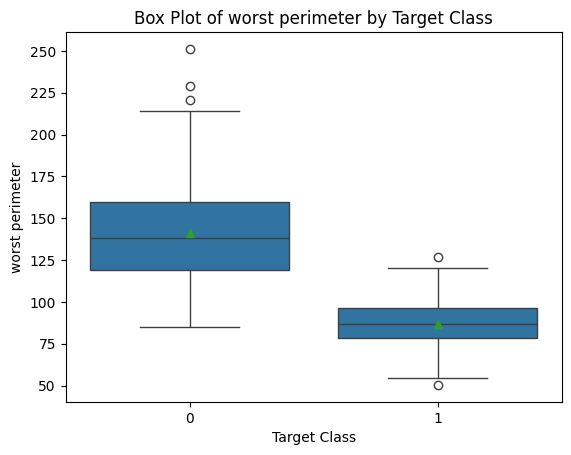

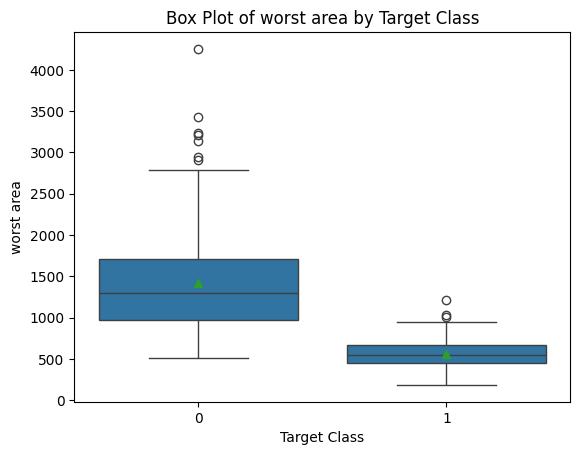

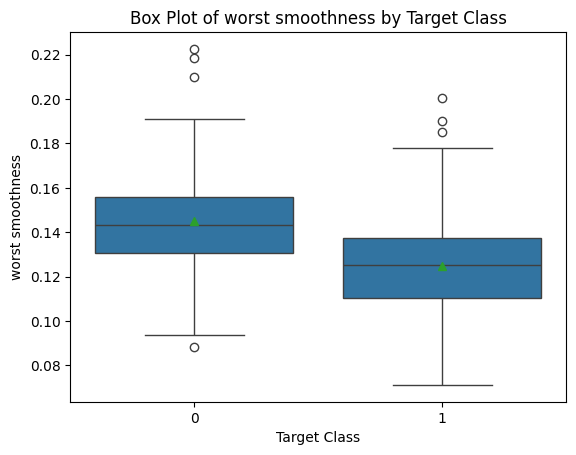

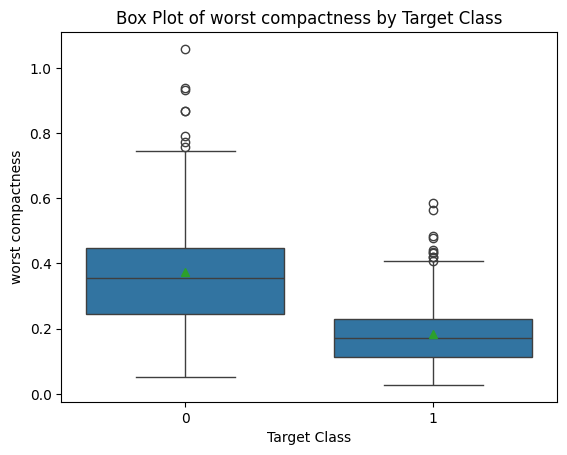

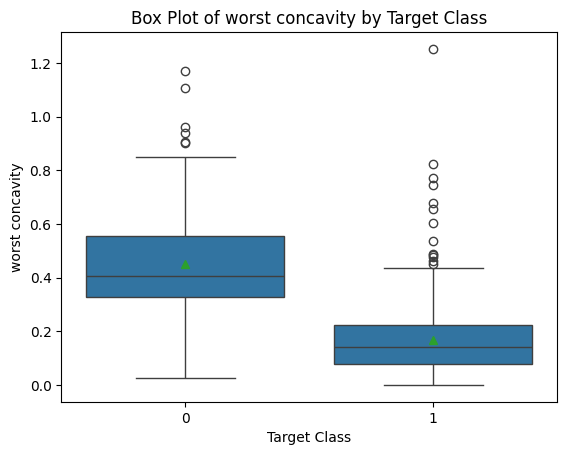

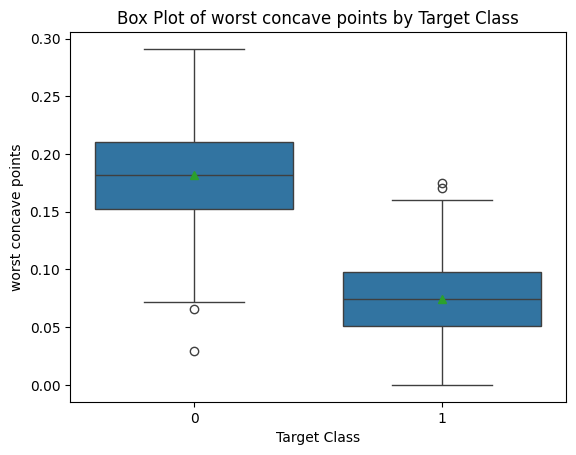

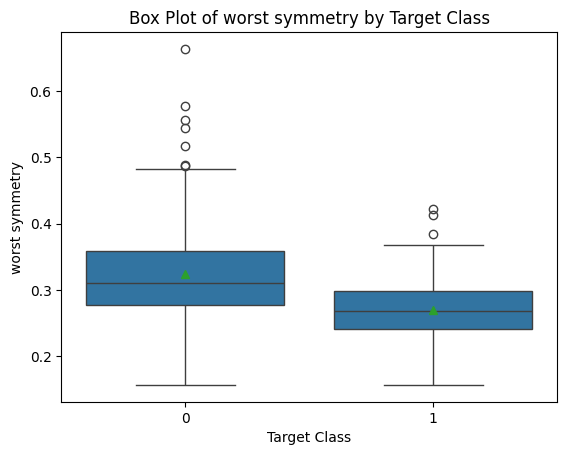

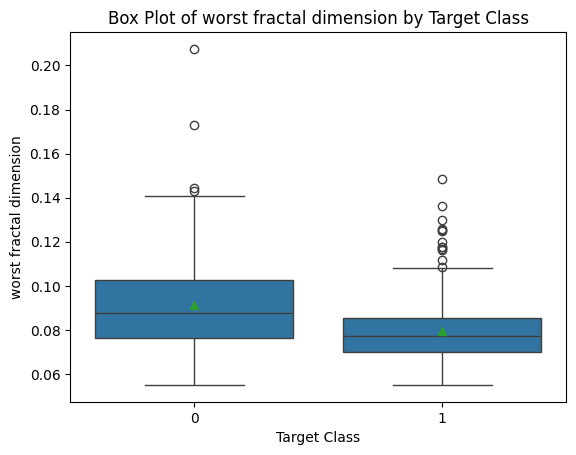

<Figure size 640x480 with 0 Axes>

In [ ]:
features = df.columns.tolist()  # Get all feature names
for feature in features:
  if feature != 'label':  # Skip the target variable
    sns.boxplot(
        x = "label",
        y = feature,
        showmeans=True,
        data=df
    )
    plt.xlabel('Target Class')
    plt.ylabel(feature)  # Set feature name as y-axis label
    plt.title(f'Box Plot of {feature} by Target Class')
    plt.show()
    plt.savefig('dataset1_boxplot.png')

In [ ]:
X = df.drop('label',axis='columns')
y = df.label

Scaling

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

Normalization (MinMax Normalization)

In [ ]:
transformer = Normalizer().fit(X)
transformer

Normalizer()

In [ ]:
X_normalized = transformer.transform(X)
X_normalized

array([[7.92541486e-03, 4.57286305e-03, 5.40989964e-02, ...,
        1.16920795e-04, 2.02695018e-04, 5.23808686e-05],
       [8.66575595e-03, 7.48616836e-03, 5.59882822e-02, ...,
        7.83583182e-05, 1.15852352e-04, 3.75024596e-05],
       [9.36668268e-03, 1.01087865e-02, 6.18419883e-02, ...,
        1.15596947e-04, 1.71873157e-04, 4.16624718e-05],
       ...,
       [1.16438847e-02, 1.96964025e-02, 7.59658259e-02, ...,
        9.94640269e-05, 1.55579134e-04, 5.48525170e-05],
       [9.23020523e-03, 1.31418408e-02, 6.27743569e-02, ...,
        1.18738077e-04, 1.83125480e-04, 5.55604587e-05],
       [2.31098880e-02, 7.30820427e-02, 1.42709515e-01, ...,
        0.00000000e+00, 8.55006294e-04, 2.09626935e-04]])

Spliting of data into Training and testing dataset

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X_scaled,y,test_size=0.2,random_state=30)

In [ ]:
print("X_train size: ",X_train.shape)
print("X_test size: ",X_test.shape)
print("y_train size: ",y_train.shape)
print("y_test size: ",y_test.shape)

X_train size:  (455, 30)
X_test size:  (114, 30)
y_train size:  (455,)
y_test size:  (114,)


Logistic Regression

Training of data

In [ ]:
lreg1 = LogisticRegression()
lreg1.fit(X_train,y_train)

LogisticRegression()

Evaluation of Model

Accuracy of Training dataset

In [ ]:
train_pred = lreg1.predict(X_train)
training_accuracy = accuracy_score(y_train,train_pred)
training_accuracy

0.989010989010989

Accuracy of testing set

In [ ]:
test_pred = lreg1.predict(X_test)
test_pred

array([0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0])

In [ ]:
test_accuracy = accuracy_score(y_test,test_pred)
test_accuracy

0.9824561403508771

In [ ]:
cm1 = confusion_matrix(y_test,test_pred)
cm1

array([[43,  1],
       [ 1, 69]])

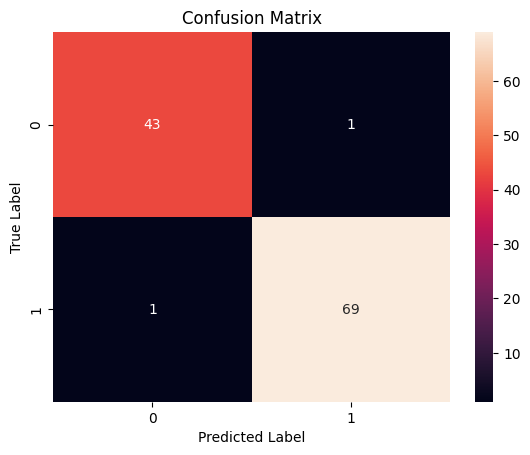

In [ ]:
sns.heatmap(cm1, annot=True, fmt="d")  # Annotate with counts and format as integer
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


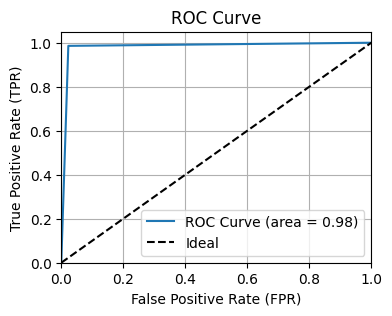

In [ ]:
y_true = y_test.tolist()
y_pred = test_pred.tolist()  # Assuming probabilities are in a column named 'y_proba'

# Calculate FPR, TPR, and thresholds using roc_curve
fpr, tpr, thresholds = roc_curve(y_test, test_pred)

# Calculate AUC (optional, you might already have it)
roc_auc = roc_auc_score(y_true, y_pred)

# Plot the ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Ideal')  # Ideal perfect classification line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


Area Under ROC Curve

In [ ]:
roc_auc_score(y_test, lreg1.predict(X_test))
roc_auc_score(y_test, lreg1.decision_function(X_test))

0.9977272727272728

In [ ]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        44
           1       0.99      0.99      0.99        70

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



Random Forest

In [ ]:
rf1 = RandomForestClassifier(n_estimators=5)
rf1.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5)

Training set accuracy

In [ ]:
train_pred = rf1.predict(X_train)
train_accuracy =  accuracy_score(y_train,train_pred)
train_accuracy

0.9934065934065934

Testing set accuracy

In [ ]:
test_pred = rf1.predict(X_test)
test_pred

array([0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0])

In [ ]:
test_accuracy = accuracy_score(y_test,test_pred)
test_accuracy

0.9385964912280702

Confusion Matrix

In [ ]:
cm2 = confusion_matrix(y_test,test_pred)
cm2

array([[39,  5],
       [ 2, 68]])

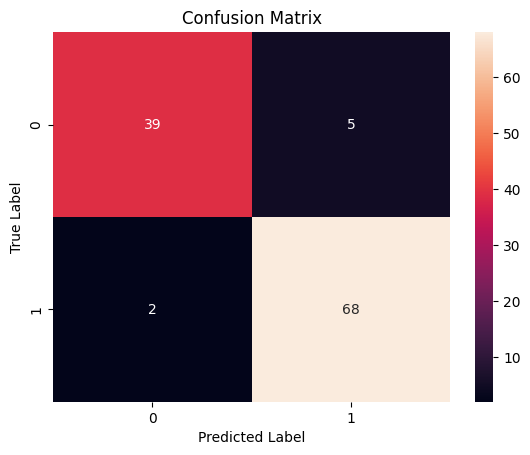

In [ ]:

sns.heatmap(cm2, annot=True, fmt="d")  # Annotate with counts and format as integer
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


ROC Curve

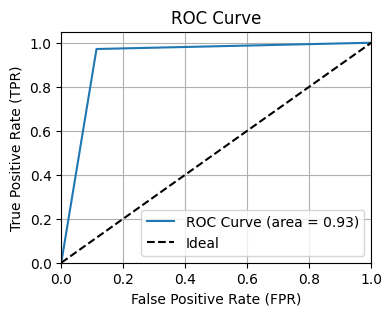

In [ ]:
y_true = y_test.tolist()
y_pred = test_pred.tolist()  # Assuming probabilities are in a column named 'y_proba'

# Calculate FPR, TPR, and thresholds using roc_curve
fpr, tpr, thresholds = roc_curve(y_test, test_pred)

# Calculate AUC (optional, you might already have it)
roc_auc = roc_auc_score(y_true, y_pred)

# Plot the ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Ideal')  # Ideal perfect classification line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92        44
           1       0.93      0.97      0.95        70

    accuracy                           0.94       114
   macro avg       0.94      0.93      0.93       114
weighted avg       0.94      0.94      0.94       114



SVM

In [ ]:
svm1 = SVC()
svm1.fit(X_train,y_train)

SVC()

Training set accuracy

In [ ]:
X_train_pred = svm1.predict(X_train)
training_accuracy = accuracy_score(y_train,X_train_pred)
training_accuracy

0.9802197802197802

Testing set accuracy

In [ ]:
test_pred = svm1.predict(X_test)
test_pred

array([0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0])

In [ ]:
testing_accuracy = accuracy_score(y_test,test_pred)
testing_accuracy

0.9736842105263158

Confusion matrix

In [ ]:
cm3 = confusion_matrix(y_test,test_pred)
cm3

array([[41,  3],
       [ 0, 70]])

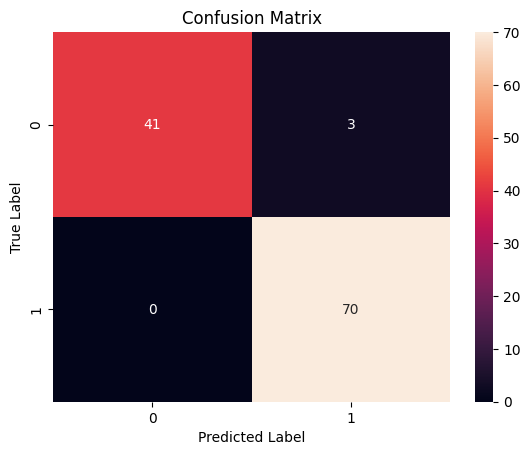

In [ ]:

sns.heatmap(cm3, annot=True, fmt="d")  # Annotate with counts and format as integer
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


ROC Curve

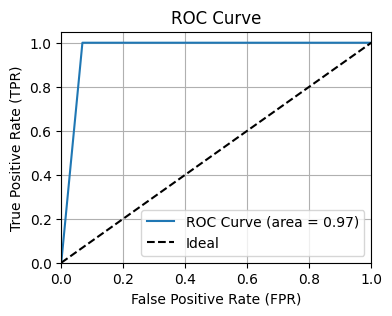

In [ ]:
y_true = y_test.tolist()
y_pred = test_pred.tolist()  # Assuming probabilities are in a column named 'y_proba'

# Calculate FPR, TPR, and thresholds using roc_curve
fpr, tpr, thresholds = roc_curve(y_test, test_pred)

# Calculate AUC (optional, you might already have it)
roc_auc = roc_auc_score(y_true, y_pred)

# Plot the ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Ideal')  # Ideal perfect classification line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        44
           1       0.96      1.00      0.98        70

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



Naive Bayes

In [ ]:
nb1 = BernoulliNB()
nb1.fit(X_train,y_train)

BernoulliNB()

Training set accuracy

In [ ]:
train_pred = nb1.predict(X_train)
training_accuracy = accuracy_score(y_train,train_pred)
training_accuracy

0.9472527472527472

Testing set accuracy

In [ ]:
test_pred = nb1.predict(X_test)
test_pred

array([0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0])

In [ ]:
test_accuracy = accuracy_score(y_test,test_pred)
test_accuracy

0.9210526315789473

Confusion matrix

In [ ]:
cm4 = confusion_matrix(y_test,test_pred)
cm4

array([[39,  5],
       [ 4, 66]])

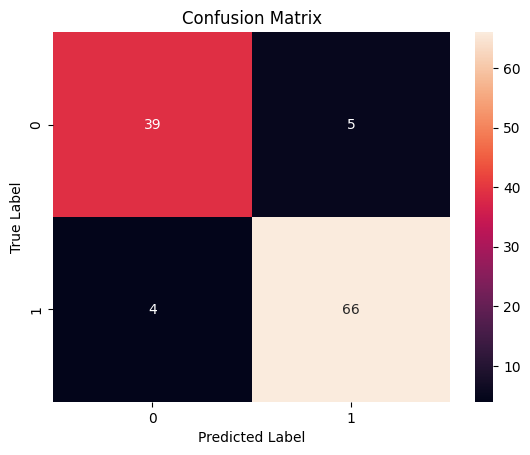

In [ ]:

sns.heatmap(cm4, annot=True, fmt="d")  # Annotate with counts and format as integer
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


ROC Curve

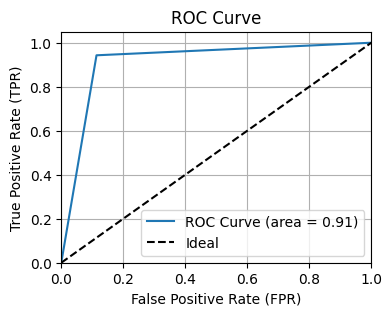

In [ ]:
y_true = y_test.tolist()
y_pred = test_pred.tolist()  # Assuming probabilities are in a column named 'y_proba'

# Calculate FPR, TPR, and thresholds using roc_curve
fpr, tpr, thresholds = roc_curve(y_test, test_pred)

# Calculate AUC (optional, you might already have it)
roc_auc = roc_auc_score(y_true, y_pred)

# Plot the ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Ideal')  # Ideal perfect classification line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90        44
           1       0.93      0.94      0.94        70

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.92       114
weighted avg       0.92      0.92      0.92       114



KNN

In [ ]:
knn1 = KNeighborsClassifier()
knn1.fit(X_train,y_train)

KNeighborsClassifier()

Training set accuracy

In [ ]:
X_train_pred = knn1.predict(X_train)
training_accuracy = accuracy_score(y_train,X_train_pred)
training_accuracy

0.9714285714285714

Testing set accuracy

In [ ]:
X_test_pred = knn1.predict(X_test)
test_accuracy = accuracy_score(y_test,X_test_pred)
test_accuracy

0.956140350877193

confusion matrix

In [ ]:
cm5 = confusion_matrix(y_test,test_pred)
cm5

array([[39,  5],
       [ 4, 66]])

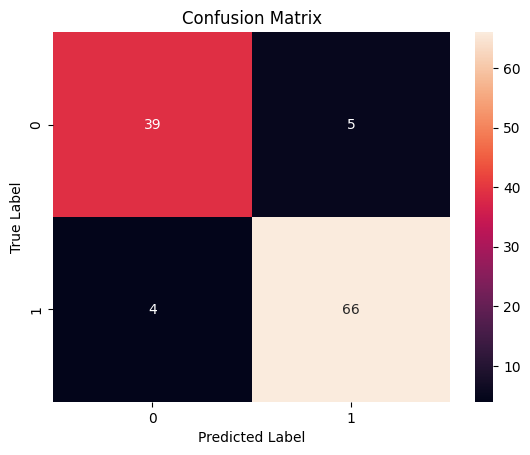

In [ ]:

sns.heatmap(cm5, annot=True, fmt="d")  # Annotate with counts and format as integer
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


ROC Curve

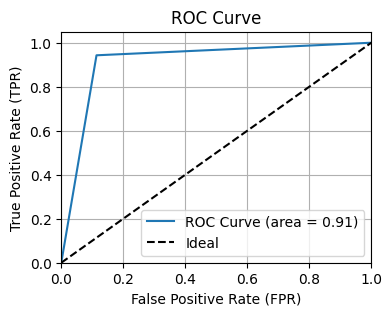

In [ ]:
y_true = y_test.tolist()
y_pred = test_pred.tolist()  # Assuming probabilities are in a column named 'y_proba'

# Calculate FPR, TPR, and thresholds using roc_curve
fpr, tpr, thresholds = roc_curve(y_test, test_pred)

# Calculate AUC (optional, you might already have it)
roc_auc = roc_auc_score(y_true, y_pred)

# Plot the ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Ideal')  # Ideal perfect classification line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90        44
           1       0.93      0.94      0.94        70

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.92       114
weighted avg       0.92      0.92      0.92       114



Correlation analysis

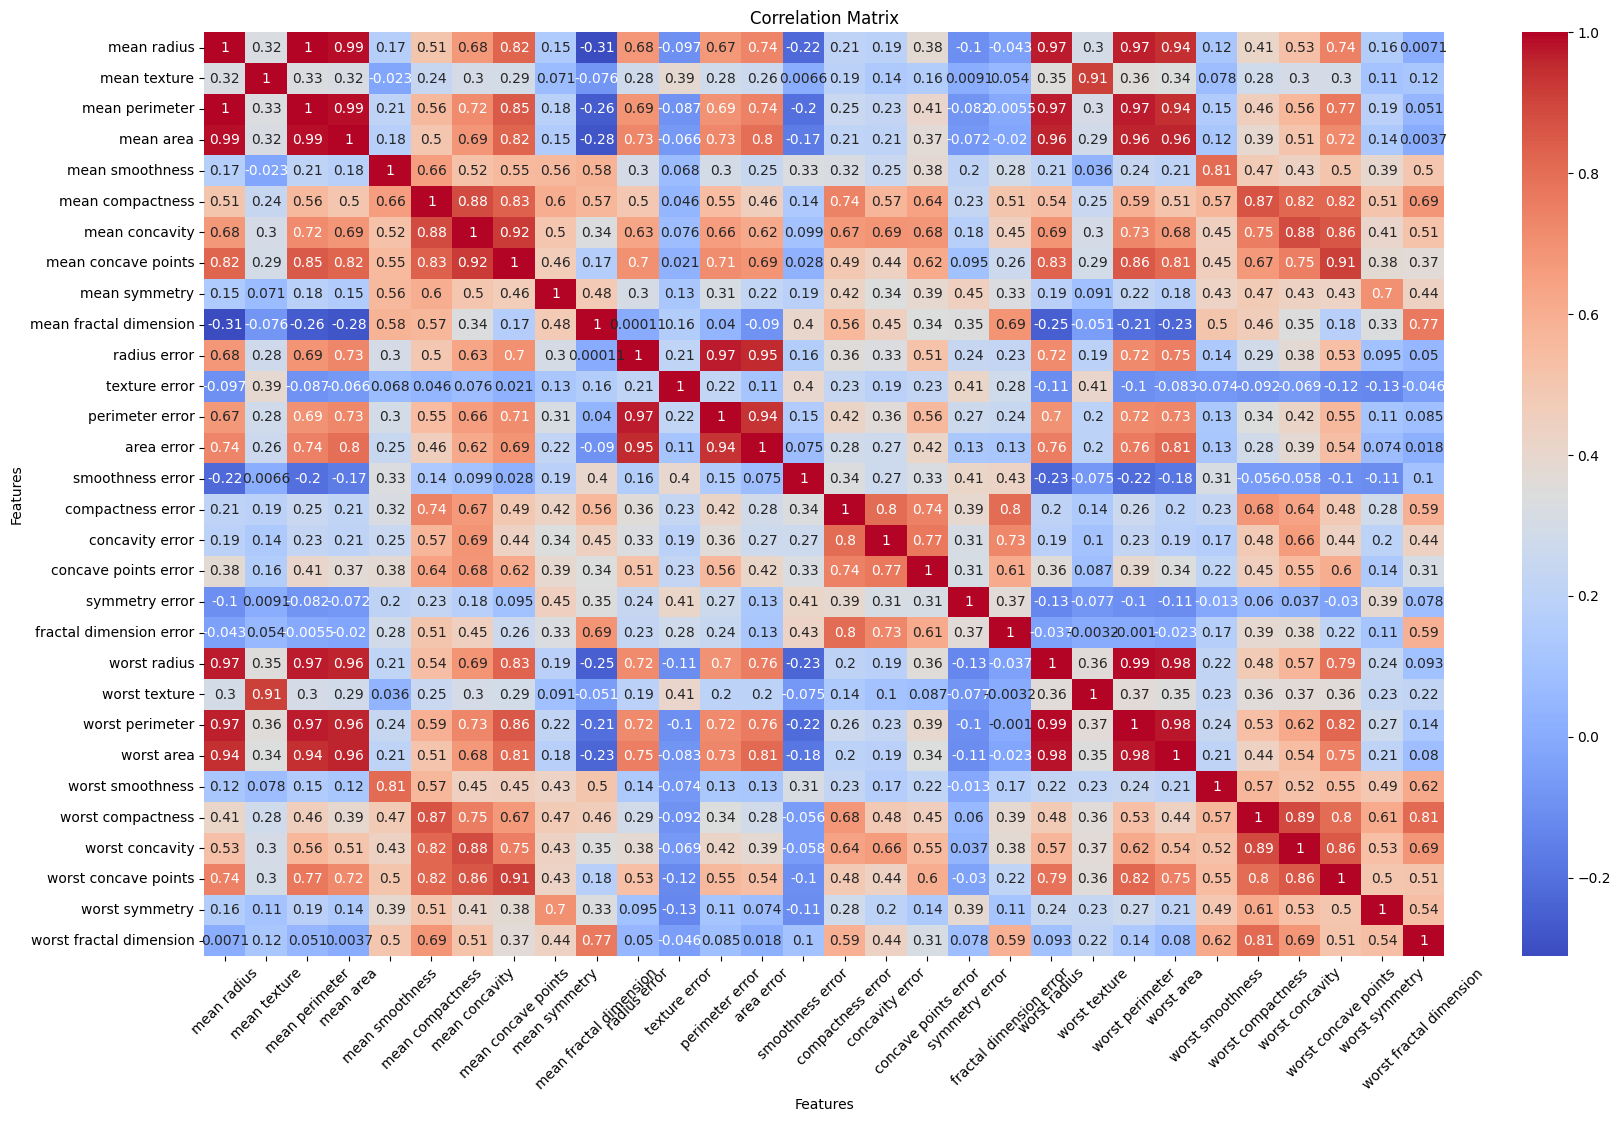

In [ ]:
correlation_matrix = X.corr()
# Create a new figure for the plot
plt.figure(figsize=(20, 12))

# Create a heatmap with annotations (values) and color gradient
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

# Add labels for the x and y axes
plt.xlabel('Features')
plt.ylabel('Features')

# Add a title for the plot
plt.title('Correlation Matrix')

# Rotate x-axis labels for better readability with many features
plt.xticks(rotation=45)
plt.show()


The features having high postive correlation can be reduced

1. Mean radius - worst area(0.94),worst perimeter(0.97),worst radius(0.97), mean area(0.99), mean perimeter(1)
2. mean texture - worst texture(0.91)
3. Mean compactness - mean concave pints(0.92)
4. Radius error - area error(0.95),perimeter error(0.97)
5. worst concave points - mean concave points(0.91)


Feature Reduction

In [ ]:
df1 = df.drop(['worst area','worst perimeter','worst radius','mean area','mean perimeter','worst texture','mean concave points','area error','perimeter error'],axis='columns')
df1

,mean radius,mean texture,mean smoothness,mean compactness,mean concavity,mean symmetry,mean fractal dimension,radius error,texture error,smoothness error,...,concave points error,symmetry error,fractal dimension error,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,0.11840,0.27760,0.30010,0.2419,0.07871,1.0950,0.9053,0.006399,...,0.01587,0.03003,0.006193,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,0.08474,0.07864,0.08690,0.1812,0.05667,0.5435,0.7339,0.005225,...,0.01340,0.01389,0.003532,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,0.10960,0.15990,0.19740,0.2069,0.05999,0.7456,0.7869,0.006150,...,0.02058,0.02250,0.004571,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,0.14250,0.28390,0.24140,0.2597,0.09744,0.4956,1.1560,0.009110,...,0.01867,0.05963,0.009208,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,0.10030,0.13280,0.19800,0.1809,0.05883,0.7572,0.7813,0.011490,...,0.01885,0.01756,0.005115,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,0.11100,0.11590,0.24390,0.1726,0.05623,1.1760,1.2560,0.010300,...,0.02454,0.01114,0.004239,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,0.09780,0.10340,0.14400,0.1752,0.05533,0.7655,2.4630,0.005769,...,0.01678,0.01898,0.002498,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,0.08455,0.10230,0.09251,0.1590,0.05648,0.4564,1.0750,0.005903,...,0.01557,0.01318,0.003892,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,0.11780,0.27700,0.35140,0.2397,0.07016,0.7260,1.5950,0.006522,...,0.01664,0.02324,0.006185,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [ ]:
df.shape

(569, 31)

In [ ]:
df1.shape

(569, 22)

In [ ]:
X1 = df1.drop('label',axis='columns')
y1 = df1.label

In [ ]:
X1_scaled = scaler.fit_transform(X1)
X1_scaled

array([[ 1.09706398, -2.07333501,  1.56846633, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241, -0.82696245, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  0.94221044, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 , -0.84048388, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.52576706, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -3.11208479, ..., -1.74506282,
        -0.04813821, -0.75120669]])

Performance of model after reducing the features

Logistic Regression

Spliting of data into Training and testing dataset

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X1_scaled,y1,test_size=0.2,random_state=30)

In [ ]:
print("X_train size: ",X_train.shape)
print("X_test size: ",X_test.shape)
print("y_train size: ",y_train.shape)
print("y_test size: ",y_test.shape)

X_train size:  (455, 21)
X_test size:  (114, 21)
y_train size:  (455,)
y_test size:  (114,)


Logistic Regression

Training of data

In [ ]:
lreg1 = LogisticRegression()
lreg1.fit(X_train,y_train)

LogisticRegression()

Evaluation of Model

Accuracy of Training dataset

In [ ]:
train_pred = lreg1.predict(X_train)
training_accuracy = accuracy_score(y_train,train_pred)
training_accuracy

0.9868131868131869

Accuracy of testing set

In [ ]:
test_pred = lreg1.predict(X_test)
test_pred

array([0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0])

In [ ]:
test_accuracy = accuracy_score(y_test,test_pred)
test_accuracy

0.9824561403508771

confusion matrix

In [ ]:
cm1 = confusion_matrix(y_test,test_pred)
cm1

array([[42,  2],
       [ 0, 70]])

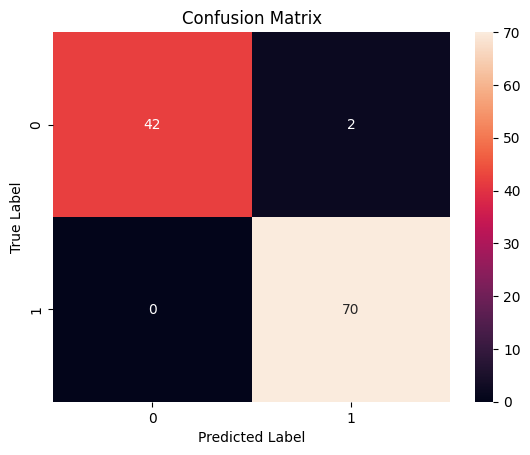

In [ ]:
sns.heatmap(cm1, annot=True, fmt="d")  # Annotate with counts and format as integer
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


ROC curve

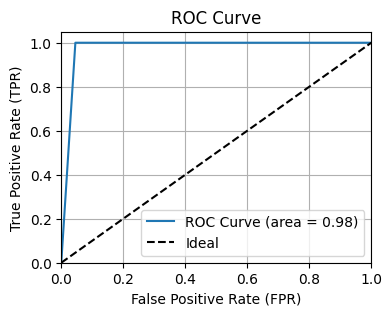

In [ ]:
y_true = y_test.tolist()
y_pred = test_pred.tolist()  # Assuming probabilities are in a column named 'y_proba'

# Calculate FPR, TPR, and thresholds using roc_curve
fpr, tpr, thresholds = roc_curve(y_test, test_pred)

# Calculate AUC (optional, you might already have it)
roc_auc = roc_auc_score(y_true, y_pred)

# Plot the ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Ideal')  # Ideal perfect classification line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98        44
           1       0.97      1.00      0.99        70

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



Random Forest

In [ ]:
rf1 = RandomForestClassifier(n_estimators=5)
rf1.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5)

Training set accuracy

In [ ]:
train_pred = rf1.predict(X_train)
train_accuracy =  accuracy_score(y_train,train_pred)
train_accuracy

0.9912087912087912

Testing set accuracy

In [ ]:
test_pred = rf1.predict(X_test)
test_pred

array([0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0])

In [ ]:
test_accuracy = accuracy_score(y_test,test_pred)
test_accuracy

0.9473684210526315

confusion matrix

In [ ]:
cm2 = confusion_matrix(y_test,test_pred)
cm2

array([[40,  4],
       [ 2, 68]])

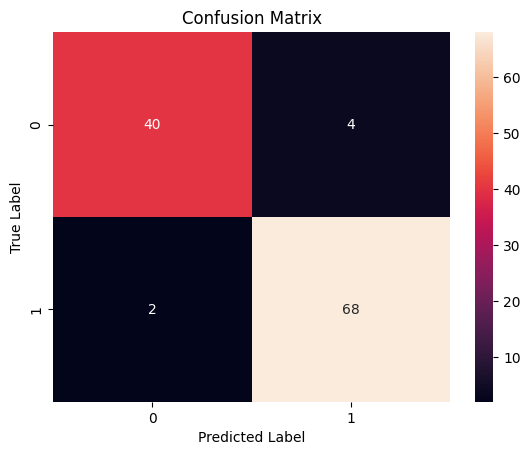

In [ ]:

sns.heatmap(cm2, annot=True, fmt="d")  # Annotate with counts and format as integer
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


ROC curve

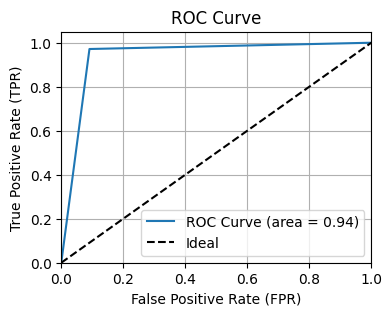

In [ ]:
y_true = y_test.tolist()
y_pred = test_pred.tolist()  # Assuming probabilities are in a column named 'y_proba'

# Calculate FPR, TPR, and thresholds using roc_curve
fpr, tpr, thresholds = roc_curve(y_test, test_pred)

# Calculate AUC (optional, you might already have it)
roc_auc = roc_auc_score(y_true, y_pred)

# Plot the ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Ideal')  # Ideal perfect classification line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        44
           1       0.94      0.97      0.96        70

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



SVM

In [ ]:
svm1 = SVC()
svm1.fit(X_train,y_train)

SVC()

Training set accuracy

In [ ]:
X_train_pred = svm1.predict(X_train)
training_accuracy = accuracy_score(y_train,X_train_pred)
training_accuracy

0.9758241758241758

Testing set accuracy

In [ ]:
test_pred = svm1.predict(X_test)
test_pred

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0])

In [ ]:
testing_accuracy = accuracy_score(y_test,test_pred)
testing_accuracy

0.9736842105263158

Confusion matrix

In [ ]:
cm3 = confusion_matrix(y_test,test_pred)
cm3

array([[41,  3],
       [ 0, 70]])

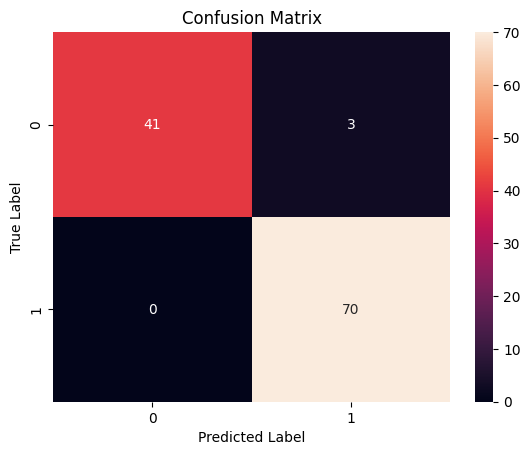

In [ ]:

sns.heatmap(cm3, annot=True, fmt="d")  # Annotate with counts and format as integer
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


ROC curve

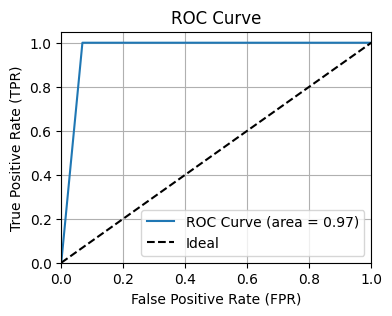

In [ ]:
y_true = y_test.tolist()
y_pred = test_pred.tolist()  # Assuming probabilities are in a column named 'y_proba'

# Calculate FPR, TPR, and thresholds using roc_curve
fpr, tpr, thresholds = roc_curve(y_test, test_pred)

# Calculate AUC (optional, you might already have it)
roc_auc = roc_auc_score(y_true, y_pred)

# Plot the ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Ideal')  # Ideal perfect classification line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        44
           1       0.96      1.00      0.98        70

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



Naive Bayes

In [ ]:
nb1 = BernoulliNB()
nb1.fit(X_train,y_train)

BernoulliNB()

Training set accuracy

In [ ]:
train_pred = nb1.predict(X_train)
training_accuracy = accuracy_score(y_train,train_pred)
training_accuracy

0.8923076923076924

Testing set accuracy

In [ ]:
test_pred = nb1.predict(X_test)
test_pred

array([1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1])

In [ ]:
test_accuracy = accuracy_score(y_test,test_pred)
test_accuracy

0.8771929824561403

confusion matrix

In [ ]:
cm4 = confusion_matrix(y_test,test_pred)
cm4

array([[35,  9],
       [ 5, 65]])

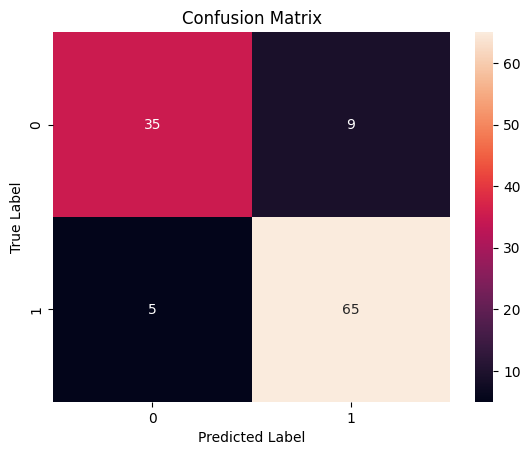

In [ ]:

sns.heatmap(cm4, annot=True, fmt="d")  # Annotate with counts and format as integer
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


ROC curve

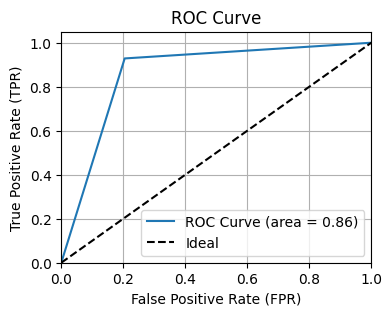

In [ ]:
y_true = y_test.tolist()
y_pred = test_pred.tolist()  # Assuming probabilities are in a column named 'y_proba'

# Calculate FPR, TPR, and thresholds using roc_curve
fpr, tpr, thresholds = roc_curve(y_test, test_pred)

# Calculate AUC (optional, you might already have it)
roc_auc = roc_auc_score(y_true, y_pred)

# Plot the ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Ideal')  # Ideal perfect classification line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.88      0.80      0.83        44
           1       0.88      0.93      0.90        70

    accuracy                           0.88       114
   macro avg       0.88      0.86      0.87       114
weighted avg       0.88      0.88      0.88       114



KNN

In [ ]:
knn1 = KNeighborsClassifier()
knn1.fit(X_train,y_train)

KNeighborsClassifier()

Training set accuracy

In [ ]:
X_train_pred = knn1.predict(X_train)
training_accuracy = accuracy_score(y_train,X_train_pred)
training_accuracy

0.967032967032967

Testing set accuracy

In [ ]:
X_test_pred = knn1.predict(X_test)
test_accuracy = accuracy_score(y_test,X_test_pred)
test_accuracy

0.9298245614035088

confusion matrix

In [ ]:
cm5 = confusion_matrix(y_test,test_pred)
cm5

array([[35,  9],
       [ 5, 65]])

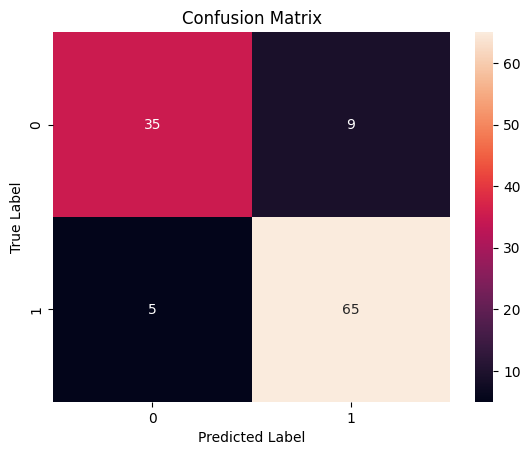

In [ ]:

sns.heatmap(cm5, annot=True, fmt="d")  # Annotate with counts and format as integer
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


ROC Curve

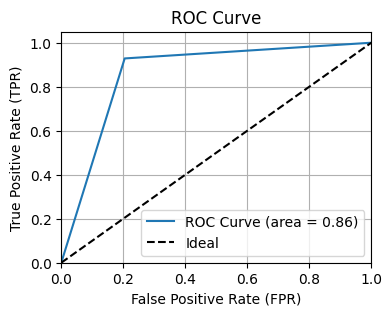

In [ ]:
y_true = y_test.tolist()
y_pred = test_pred.tolist()  # Assuming probabilities are in a column named 'y_proba'

# Calculate FPR, TPR, and thresholds using roc_curve
fpr, tpr, thresholds = roc_curve(y_test, test_pred)

# Calculate AUC (optional, you might already have it)
roc_auc = roc_auc_score(y_true, y_pred)

# Plot the ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Ideal')  # Ideal perfect classification line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.88      0.80      0.83        44
           1       0.88      0.93      0.90        70

    accuracy                           0.88       114
   macro avg       0.88      0.86      0.87       114
weighted avg       0.88      0.88      0.88       114



SMOTE Analysis

In [ ]:
df2 = df.copy()

In [ ]:
X2 = df2.drop('label',axis='columns')
y2 = df.label

In [ ]:
scaler = StandardScaler()
X2_scaled = scaler.fit_transform(X2)
X2_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X2_scaled,y2,test_size=0.2,random_state=30)

In [ ]:
print("X_train size: ",X_train.shape)
print("X_test size: ",X_test.shape)
print("y_train size: ",y_train.shape)
print("y_test size: ",y_test.shape)

X_train size:  (455, 30)
X_test size:  (114, 30)
y_train size:  (455,)
y_test size:  (114,)


In [ ]:

from imblearn.over_sampling import SMOTE

# Check class distribution before SMOTE
print("Class distribution before SMOTE:")
print(y_train.value_counts())

# Create an SMOTE instance (adjust k_neighbors as needed)
smote = SMOTE(k_neighbors=5)  # Experiment with different k values

# Apply SMOTE to oversample the minority class
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Check class distribution after SMOTE
print("Class distribution after SMOTE:")
print(y_resampled.value_counts())

# Now you can use X_resampled and y_resampled for training your machine learning model


Class distribution before SMOTE:
label
1    287
0    168
Name: count, dtype: int64
Class distribution after SMOTE:
label
0    287
1    287
Name: count, dtype: int64


Performance of model after SMOTE analysis

Logistic Regression

Training of data

In [ ]:
lreg1 = LogisticRegression()
lreg1.fit(X_train,y_train)

LogisticRegression()

Evaluation of Model

Accuracy of Training dataset

In [ ]:
train_pred = lreg1.predict(X_train)
training_accuracy = accuracy_score(y_train,train_pred)
training_accuracy

0.989010989010989

Accuracy of testing set

In [ ]:
test_pred = lreg1.predict(X_test)
test_pred

array([0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0])

In [ ]:
test_accuracy = accuracy_score(y_test,test_pred)
test_accuracy

0.9824561403508771

confusion matrix

In [ ]:
cm1 = confusion_matrix(y_test,test_pred)
cm1

array([[43,  1],
       [ 1, 69]])

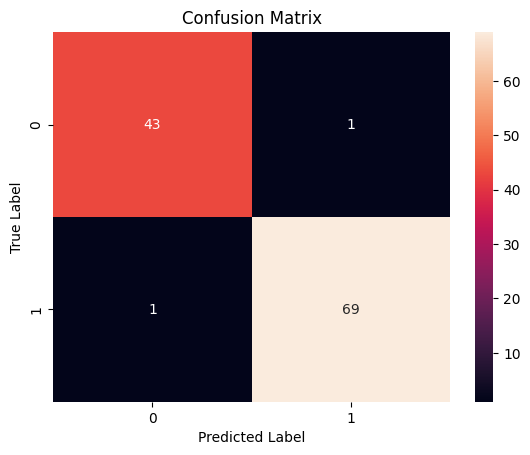

In [ ]:
sns.heatmap(cm1, annot=True, fmt="d")  # Annotate with counts and format as integer
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


ROC curve

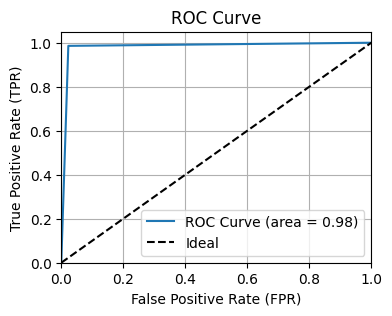

In [ ]:
y_true = y_test.tolist()
y_pred = test_pred.tolist()  # Assuming probabilities are in a column named 'y_proba'

# Calculate FPR, TPR, and thresholds using roc_curve
fpr, tpr, thresholds = roc_curve(y_test, test_pred)

# Calculate AUC (optional, you might already have it)
roc_auc = roc_auc_score(y_true, y_pred)

# Plot the ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Ideal')  # Ideal perfect classification line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


Area Under ROC Curve

In [ ]:
roc_auc_score(y_test, lreg1.predict(X_test))
roc_auc_score(y_test, lreg1.decision_function(X_test))

0.9977272727272728

In [ ]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        44
           1       0.99      0.99      0.99        70

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



Random Forest

In [ ]:
rf1 = RandomForestClassifier(n_estimators=5)
rf1.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5)

Training set accuracy

In [ ]:
train_pred = rf1.predict(X_train)
train_accuracy =  accuracy_score(y_train,train_pred)
train_accuracy

0.9934065934065934

Testing set accuracy

In [ ]:
test_pred = rf1.predict(X_test)
test_pred

array([0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0])

In [ ]:
test_accuracy = accuracy_score(y_test,test_pred)
test_accuracy

0.9473684210526315

confusion matrix

In [ ]:
cm2 = confusion_matrix(y_test,test_pred)
cm2

array([[39,  5],
       [ 1, 69]])

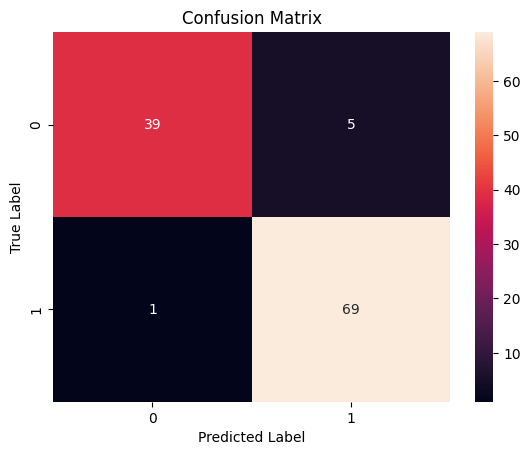

In [ ]:

sns.heatmap(cm2, annot=True, fmt="d")  # Annotate with counts and format as integer
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


ROC curve

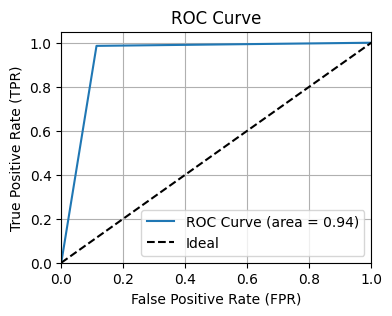

In [ ]:
y_true = y_test.tolist()
y_pred = test_pred.tolist()  # Assuming probabilities are in a column named 'y_proba'

# Calculate FPR, TPR, and thresholds using roc_curve
fpr, tpr, thresholds = roc_curve(y_test, test_pred)

# Calculate AUC (optional, you might already have it)
roc_auc = roc_auc_score(y_true, y_pred)

# Plot the ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Ideal')  # Ideal perfect classification line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93        44
           1       0.93      0.99      0.96        70

    accuracy                           0.95       114
   macro avg       0.95      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



SVM

In [ ]:
svm1 = SVC()
svm1.fit(X_train,y_train)

SVC()

Training set accuracy

In [ ]:
X_train_pred = svm1.predict(X_train)
training_accuracy = accuracy_score(y_train,X_train_pred)
training_accuracy

0.9802197802197802

Testing set accuracy

In [ ]:
test_pred = svm1.predict(X_test)
test_pred

array([0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0])

In [ ]:
testing_accuracy = accuracy_score(y_test,test_pred)
testing_accuracy

0.9736842105263158

confusion matrix

In [ ]:
cm3 = confusion_matrix(y_test,test_pred)
cm3

array([[41,  3],
       [ 0, 70]])

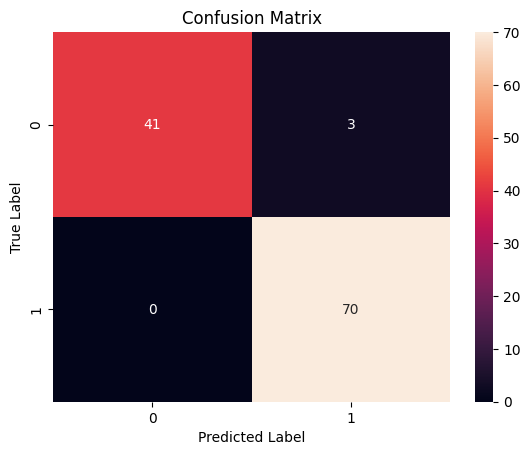

In [ ]:

sns.heatmap(cm3, annot=True, fmt="d")  # Annotate with counts and format as integer
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


ROC curve

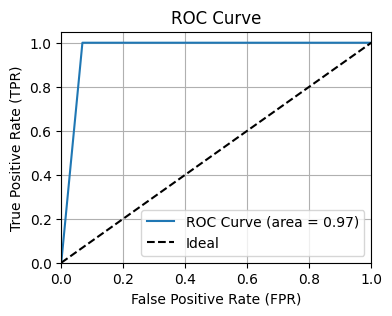

In [ ]:
y_true = y_test.tolist()
y_pred = test_pred.tolist()  # Assuming probabilities are in a column named 'y_proba'

# Calculate FPR, TPR, and thresholds using roc_curve
fpr, tpr, thresholds = roc_curve(y_test, test_pred)

# Calculate AUC (optional, you might already have it)
roc_auc = roc_auc_score(y_true, y_pred)

# Plot the ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Ideal')  # Ideal perfect classification line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        44
           1       0.96      1.00      0.98        70

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



Naive Bayes

In [ ]:
nb1 = BernoulliNB()
nb1.fit(X_train,y_train)

BernoulliNB()

Training set accuracy

In [ ]:
train_pred = nb1.predict(X_train)
training_accuracy = accuracy_score(y_train,train_pred)
training_accuracy

0.9472527472527472

Testing set accuracy

In [ ]:
test_pred = nb1.predict(X_test)
test_pred

array([0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0])

In [ ]:
test_accuracy = accuracy_score(y_test,test_pred)
test_accuracy

0.9210526315789473

confusion matrix

In [ ]:
cm4 = confusion_matrix(y_test,test_pred)
cm4

array([[39,  5],
       [ 4, 66]])

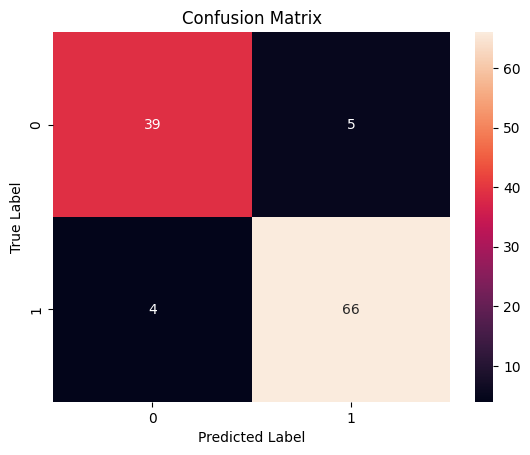

In [ ]:

sns.heatmap(cm4, annot=True, fmt="d")  # Annotate with counts and format as integer
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


ROC curve

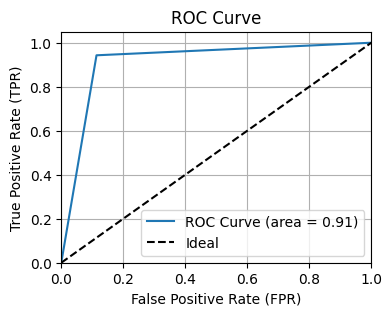

In [ ]:
y_true = y_test.tolist()
y_pred = test_pred.tolist()  # Assuming probabilities are in a column named 'y_proba'

# Calculate FPR, TPR, and thresholds using roc_curve
fpr, tpr, thresholds = roc_curve(y_test, test_pred)

# Calculate AUC (optional, you might already have it)
roc_auc = roc_auc_score(y_true, y_pred)

# Plot the ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Ideal')  # Ideal perfect classification line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90        44
           1       0.93      0.94      0.94        70

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.92       114
weighted avg       0.92      0.92      0.92       114



KNN

In [ ]:
knn1 = KNeighborsClassifier()
knn1.fit(X_train,y_train)

KNeighborsClassifier()

Training set accuracy

In [ ]:
X_train_pred = knn1.predict(X_train)
training_accuracy = accuracy_score(y_train,X_train_pred)
training_accuracy

0.9714285714285714

Testing set accuracy

In [ ]:
X_test_pred = knn1.predict(X_test)
test_accuracy = accuracy_score(y_test,X_test_pred)
test_accuracy

0.956140350877193

confusion matrix

In [ ]:
cm5 = confusion_matrix(y_test,test_pred)
cm5

array([[39,  5],
       [ 4, 66]])

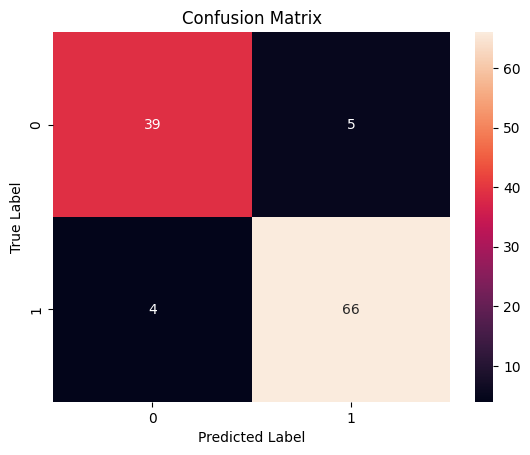

In [ ]:

sns.heatmap(cm5, annot=True, fmt="d")  # Annotate with counts and format as integer
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


ROC Curve

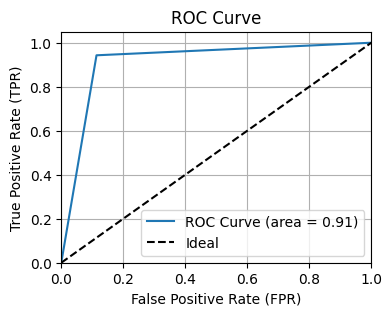

In [ ]:
y_true = y_test.tolist()
y_pred = test_pred.tolist()  # Assuming probabilities are in a column named 'y_proba'

# Calculate FPR, TPR, and thresholds using roc_curve
fpr, tpr, thresholds = roc_curve(y_test, test_pred)

# Calculate AUC (optional, you might already have it)
roc_auc = roc_auc_score(y_true, y_pred)

# Plot the ROC curve
plt.figure(figsize=(4, 3))
plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Ideal')  # Ideal perfect classification line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
print(classification_report(y_test,test_pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90        44
           1       0.93      0.94      0.94        70

    accuracy                           0.92       114
   macro avg       0.92      0.91      0.92       114
weighted avg       0.92      0.92      0.92       114

